<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignment_Set_8/Classification/Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import matplotlib.pyplot as plt

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
#optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [3]:
# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

169009152/169001437 [==============================] - 11s 0us/step


## **Model with Adam optimizer**

In [4]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
Total params: 629,732
Trainable params: 629,732
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history_f1 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 12s 15ms/step - loss: 3.7097 - accuracy: 0.1574 - val_loss: 3.3159 - val_accuracy: 0.2246
Epoch 2/20
800/800 [==============================] - 12s 15ms/step - loss: 3.0060 - accuracy: 0.2860 - val_loss: 3.1781 - val_accuracy: 0.2559
Epoch 3/20
800/800 [==============================] - 12s 15ms/step - loss: 2.6499 - accuracy: 0.3571 - val_loss: 3.1068 - val_accuracy: 0.2730
Epoch 4/20
800/800 [==============================] - 12s 15ms/step - loss: 2.3102 - accuracy: 0.4288 - val_loss: 3.1643 - val_accuracy: 0.2752
Epoch 5/20
800/800 [==============================] - 12s 15ms/step - loss: 1.9971 - accuracy: 0.5001 - val_loss: 3.2887 - val_accuracy: 0.2783
Epoch 6/20
800/800 [==============================] - 12s 15ms/step - loss: 1.7227 - accuracy: 0.5629 - val_loss: 3.4236 - val_accuracy: 0.2798
Epoch 7/20
800/800 [==============================] - 12s 15ms/step - loss: 1.4815 - accuracy: 0.6220 - val_loss: 3.5513 - val_accuracy:

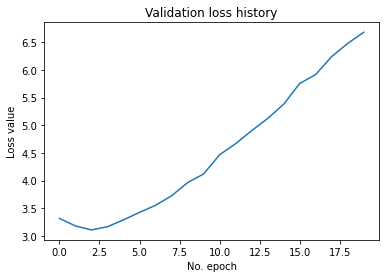

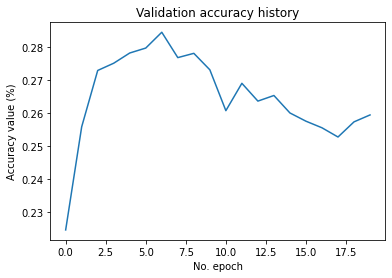

In [6]:
# Visualize history
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

### **Model with SGD**

In [10]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=SGD(),
              metrics=['accuracy'])

# Fit data to model
history_f2 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 12s 15ms/step - loss: 0.1187 - accuracy: 0.9820 - val_loss: 6.7398 - val_accuracy: 0.2606
Epoch 2/20
800/800 [==============================] - 11s 14ms/step - loss: 0.1019 - accuracy: 0.9861 - val_loss: 6.7985 - val_accuracy: 0.2608
Epoch 3/20
800/800 [==============================] - 15s 19ms/step - loss: 0.0947 - accuracy: 0.9882 - val_loss: 6.8545 - val_accuracy: 0.2617
Epoch 4/20
800/800 [==============================] - 12s 14ms/step - loss: 0.0892 - accuracy: 0.9893 - val_loss: 6.9172 - val_accuracy: 0.2633
Epoch 5/20
800/800 [==============================] - 12s 14ms/step - loss: 0.0849 - accuracy: 0.9901 - val_loss: 6.9838 - val_accuracy: 0.2593
Epoch 6/20
800/800 [==============================] - 12s 14ms/step - loss: 0.0819 - accuracy: 0.9904 - val_loss: 6.9664 - val_accuracy: 0.2650
Epoch 7/20
800/800 [==============================] - 12s 14ms/step - loss: 0.0788 - accuracy: 0.9906 - val_loss: 7.0517 - val_accuracy:

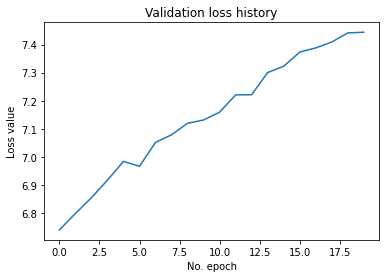

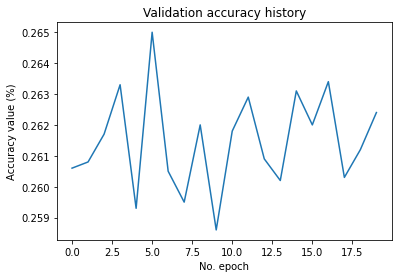

In [11]:
# Visualize history
# Plot history: Loss
plt.plot(history_f2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Model with RMSprop**

In [14]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Fit data to model
history_f3 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 14s 17ms/step - loss: 0.0366 - accuracy: 0.9908 - val_loss: 11.7277 - val_accuracy: 0.2492
Epoch 2/20
800/800 [==============================] - 13s 17ms/step - loss: 0.0311 - accuracy: 0.9926 - val_loss: 11.8301 - val_accuracy: 0.2484
Epoch 3/20
800/800 [==============================] - 16s 21ms/step - loss: 0.0316 - accuracy: 0.9928 - val_loss: 12.0041 - val_accuracy: 0.2448
Epoch 4/20
800/800 [==============================] - 14s 17ms/step - loss: 0.0281 - accuracy: 0.9927 - val_loss: 12.1702 - val_accuracy: 0.2547
Epoch 5/20
800/800 [==============================] - 13s 17ms/step - loss: 0.0267 - accuracy: 0.9931 - val_loss: 12.3963 - val_accuracy: 0.2487
Epoch 6/20
800/800 [==============================] - 14s 17ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 12.5571 - val_accuracy: 0.2450
Epoch 7/20
800/800 [==============================] - 13s 17ms/step - loss: 0.0241 - accuracy: 0.9941 - val_loss: 12.6486 - val_ac

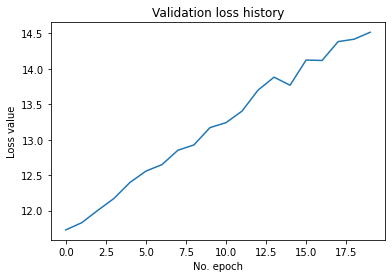

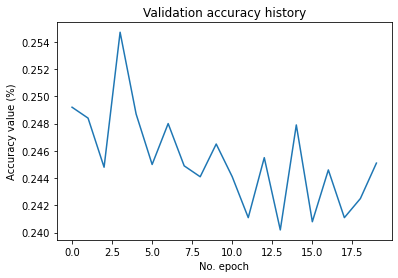

In [15]:
# Visualize history
# Plot history: Loss
plt.plot(history_f3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Compare Models**

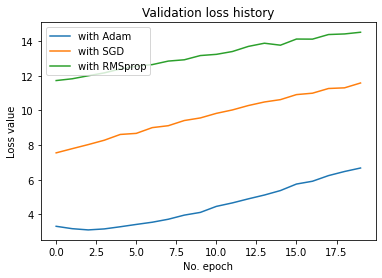

In [16]:
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.plot(history_f2.history['val_loss'])
plt.plot(history_f3.history['val_loss'])

plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['with Adam','with SGD ','with RMSprop'], loc='upper left')
plt.show()

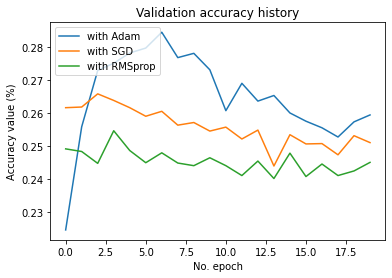

In [17]:
# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.plot(history_f2.history['val_accuracy'])
plt.plot(history_f3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['with Adam','with SGD ','with RMSprop'], loc='upper left')
plt.show()

## **Model with Dropout(p=0.2)**

In [19]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          25632     
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               80100     
Total params: 108,164
Trainable params: 108,164
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history_f4 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 20s 24ms/step - loss: 3.9728 - accuracy: 0.1010 - val_loss: 3.6587 - val_accuracy: 0.1523
Epoch 2/20
800/800 [==============================] - 17s 21ms/step - loss: 3.4433 - accuracy: 0.1899 - val_loss: 3.3993 - val_accuracy: 0.2012
Epoch 3/20
800/800 [==============================] - 17s 21ms/step - loss: 3.1943 - accuracy: 0.2370 - val_loss: 3.2253 - val_accuracy: 0.2345
Epoch 4/20
800/800 [==============================] - 17s 21ms/step - loss: 3.0439 - accuracy: 0.2642 - val_loss: 3.1759 - val_accuracy: 0.2433
Epoch 5/20
800/800 [==============================] - 17s 21ms/step - loss: 2.9265 - accuracy: 0.2871 - val_loss: 3.1251 - val_accuracy: 0.2602
Epoch 6/20
800/800 [==============================] - 17s 21ms/step - loss: 2.8239 - accuracy: 0.3068 - val_loss: 3.0760 - val_accuracy: 0.2669
Epoch 7/20
800/800 [==============================] - 17s 21ms/step - loss: 2.7321 - accuracy: 0.3261 - val_loss: 3.0718 - val_accuracy:

## **Model with Dropout(p=0.5)**

In [22]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        2432      
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 32)          25632     
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               80100     
Total params: 108,164
Trainable params: 108,164
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history_f5 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 18s 22ms/step - loss: 4.0275 - accuracy: 0.0914 - val_loss: 3.6258 - val_accuracy: 0.1638
Epoch 2/20
800/800 [==============================] - 18s 22ms/step - loss: 3.4563 - accuracy: 0.1912 - val_loss: 3.3191 - val_accuracy: 0.2133
Epoch 3/20
800/800 [==============================] - 18s 22ms/step - loss: 3.2181 - accuracy: 0.2350 - val_loss: 3.1914 - val_accuracy: 0.2395
Epoch 4/20
800/800 [==============================] - 18s 22ms/step - loss: 3.0501 - accuracy: 0.2640 - val_loss: 3.1077 - val_accuracy: 0.2607
Epoch 5/20
800/800 [==============================] - 18s 22ms/step - loss: 2.9274 - accuracy: 0.2864 - val_loss: 3.0879 - val_accuracy: 0.2652
Epoch 6/20
800/800 [==============================] - 17s 22ms/step - loss: 2.8307 - accuracy: 0.3051 - val_loss: 3.0411 - val_accuracy: 0.2772
Epoch 7/20
800/800 [==============================] - 18s 22ms/step - loss: 2.7463 - accuracy: 0.3210 - val_loss: 3.0034 - val_accuracy:

## **Compare Models**

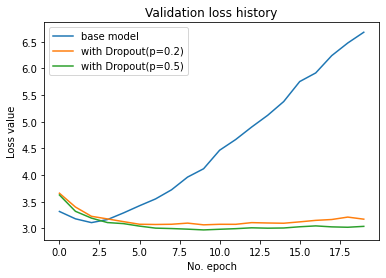

In [24]:
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.plot(history_f4.history['val_loss'])
plt.plot(history_f5.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['base model','with Dropout(p=0.2)','with Dropout(p=0.5)'], loc='upper left')
plt.show()

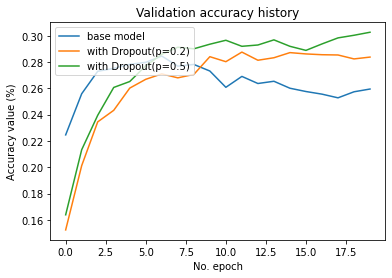

In [25]:
# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.plot(history_f4.history['val_accuracy'])
plt.plot(history_f5.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['base model','with Dropout(p=0.2)','with Dropout(p=0.5)'], loc='upper left')
plt.show()